# <center>Scikit-learn 101</center>

# 1. Python Distribution: ANACONDA

## https://www.continuum.io/downloads

# 2. Iris Dataset

![Alt text](iris.jpg)

## 2.1 Load the dataset:

In [11]:
from sklearn import datasets
iris = datasets.load_iris()

import pandas
data = pandas.DataFrame(iris.data, columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width'])
target = pandas.DataFrame(iris.target, columns = ['class'])
dataset = pandas.concat([data, target], axis = 1)

dataset.head(5)

sepal-length  sepal-width  petal-length  petal-width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0

## 2.2 Statistical summary

In [12]:
dataset.describe()

sepal-length  sepal-width  petal-length  petal-width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

## 2.3 Class distribution

In [13]:
class_map = {0: "Iris setosa", 1: "Iris versicolor", 2: "Iris virginica"}
dataset['name_of_class'] = dataset['class'].replace(class_map)

dataset.groupby(['name_of_class', 'class']).size()

name_of_class    class
Iris setosa      0        50
Iris versicolor  1        50
Iris virginica   2        50
dtype: int64

<p>
<img src="Iris_setosa.jpg" alt="Iris setosa" style=" float: left; width:200px; height:200px;"/>
<img src="Iris_versicolor.jpg" alt="Iris versicolor" style="float: left; margin-left: 100px; width:200px; height:200px;"/>
<img src="Iris_virginica.jpg" alt="Iris virginica" style="width:200px; height:200px;"/>  
</p>


# 3. Data Visualization


# 3.1 Plot the data with the first two features: Sepal Length, Sepal Width

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 9]

X = iris.data[:, :2]
y = iris.target

colors = ['r', 'g', 'b']

for i, item in enumerate(dataset["name_of_class"].unique()):
    sub_data = dataset.loc[dataset['name_of_class'] == item]
    plt.scatter(sub_data["sepal-length"], sub_data["sepal-width"], color=colors[i], s= 40, label=item)
    
    
plt.xlabel('Sepal length',fontsize=30)
plt.ylabel('Sepal width', fontsize=30)
plt.legend()
plt.show()

# 3.2 Dimensionality reduction: principal component analysis (PCA)

## 3.2.1 3D plot

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(12, 9))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)

for i, item in enumerate(dataset["name_of_class"].unique()):
    start = i * 50
    end = (i +1) * 50 -1
    
    ax.scatter(X_reduced[start:end, 0], X_reduced[start:end, 1], X_reduced[start:end, 2], color=colors[i], label=item, s=40)
    
    
ax.set_title("A three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=20, bbox_to_anchor=(0, 0))
plt.show()

## 3.1.2 2D plot

In [16]:
plt.rcParams["figure.figsize"] = [12, 9]

X_reduced = PCA(n_components=2).fit_transform(iris.data)

for i, item in enumerate(dataset["name_of_class"].unique()):
    start = i * 50
    end = (i +1) * 50 -1
    
    plt.scatter(X_reduced[start:end, 0], X_reduced[start:end, 1], color=colors[i], label=item, s=40)
    
    
plt.title("A two PCA directions")
# plt.xlabel("1st eigenvector")
# plt.ylabel("2nd eigenvector")

plt.legend(loc='upper left', numpoints=1, ncol=1, fontsize=20, bbox_to_anchor=(1, 1))
plt.show()

# 4. Build Models

## Train/test split

In [17]:
import numpy as np
from sklearn import model_selection
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(np.array(iris.data), np.array(iris.target), test_size=validation_size, random_state=seed)

## 4.1 Classification
### 4.1.1 K-Nearest Neighbors (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print("Accuracy: " + str(accuracy_score(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))

# knn.score(X_validation,Y_validation)

Accuracy: 0.9
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.85      0.92      0.88        12
          2       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30



In [19]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

n_neighbors = 15

X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# we create an instance of Neighbours Classifier and fit the data.
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.brg, edgecolor='k', s=40)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'distance'))

plt.show()

## 4.1.2 Support Vector Machine (SVM)

In [20]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print("Accuracy: " + str(accuracy_score(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))

Accuracy: 0.933333333333
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       1.00      0.83      0.91        12
          2       0.85      1.00      0.92        11

avg / total       0.94      0.93      0.93        30



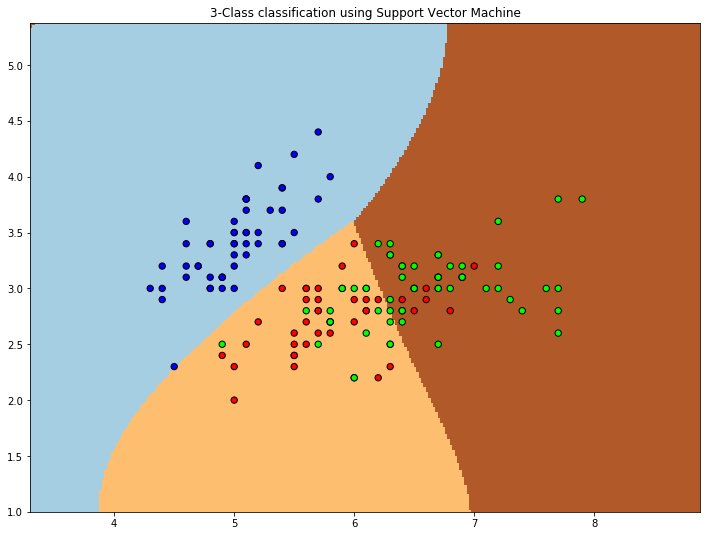

In [21]:
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
svm = SVC()
svm.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.brg, edgecolors='k', s=40)
plt.title('3-Class classification using Support Vector Machine')
plt.axis('tight')
plt.show()

# 4.1.4 Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
predictions = tree.predict(X_validation)

print("Accuracy: " + str(accuracy_score(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))

Accuracy: 0.866666666667
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.79      0.92      0.85        12
          2       0.89      0.73      0.80        11

avg / total       0.87      0.87      0.87        30



<img src="decisiontree.png" style="width: 400px"/>

## 4.1.3 Naive Bayes

In [23]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predictions = gnb.predict(X_validation)

print("Accuracy: " + str(accuracy_score(Y_validation, predictions)))
print(classification_report(Y_validation, predictions))

Accuracy: 0.833333333333
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         7
          1       0.82      0.75      0.78        12
          2       0.75      0.82      0.78        11

avg / total       0.84      0.83      0.83        30



# 4.2 Clustering 

## 4.2.1 K- Means

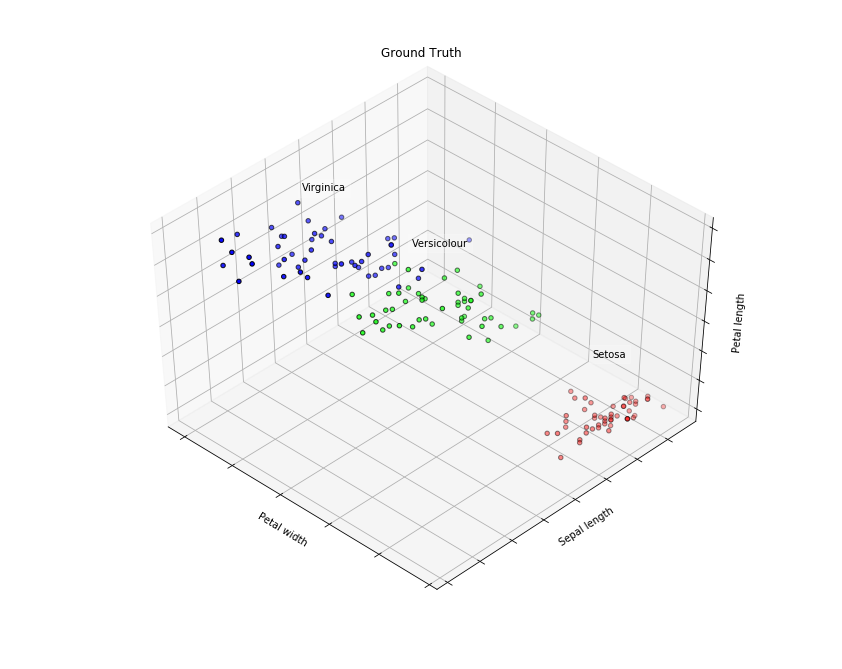

In [26]:
from sklearn.cluster import KMeans

X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

fig = plt.figure(1, figsize=(12, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = kmeans.labels_

ax.scatter(X[:, 3], X[:, 0], X[:, 2],
           c=labels.astype(np.float), edgecolor='k',cmap=plt.cm.brg)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title("K-Means with 3 clusters")
ax.dist = 12


fig = plt.figure(2, figsize=(12, 9))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k',cmap=plt.cm.brg)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

plt.show()

## <center> References </center>

[1] scikit-learn: http://scikit-learn.org/stable/index.html

[2] Your First Machine Learning Project in Python Step-By-Step: http://machinelearningmastery.com/machine-learning-in-python-step-by-step/

[3] scikit-learn: machine learning in Python: http://www.scipy-lectures.org/advanced/scikit-learn/